In [1]:
import numpy as np

import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist  # loading the MNIST dataset.

#for building model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout


## Getting data and preprocessing it

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [3]:
# to visualize a single input image along with its label.
def plot_input_image(i):
    plt.imshow(X_train[i], cmap='binary')
    plt.title(y_train[i])
    plt.show()

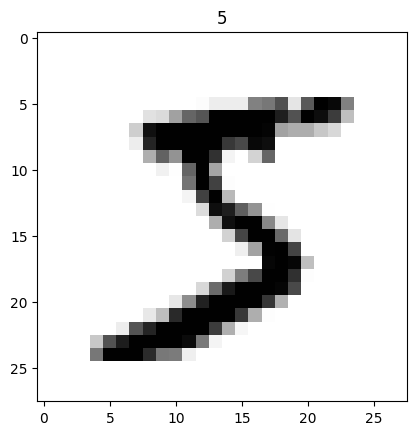

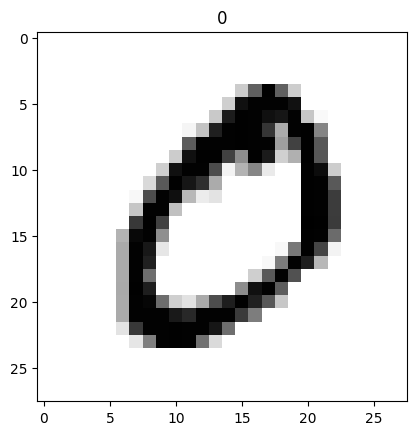

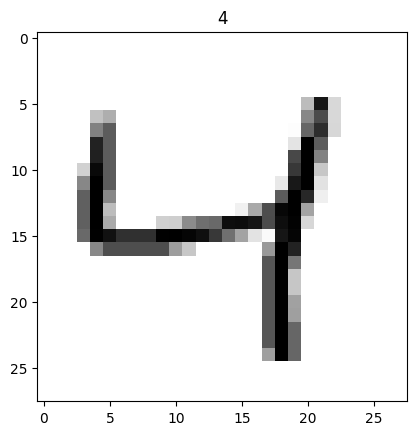

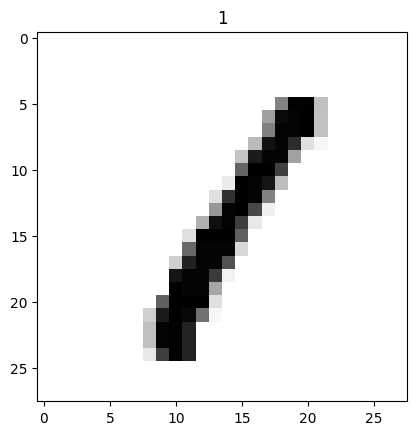

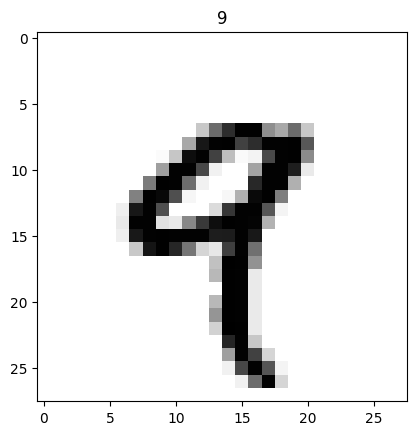

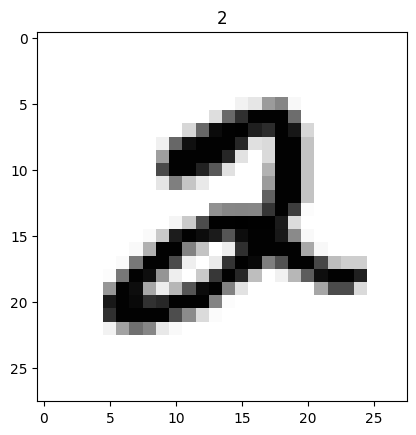

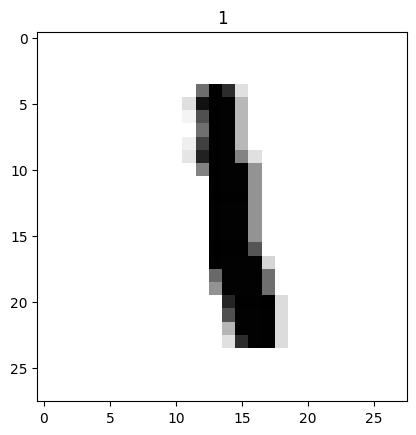

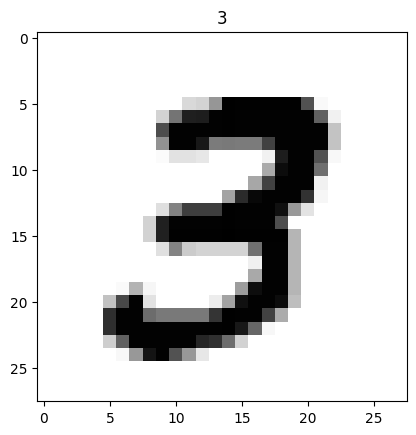

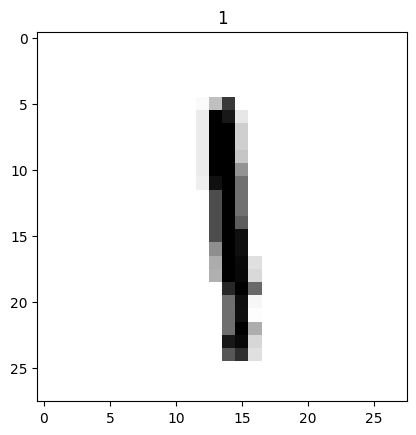

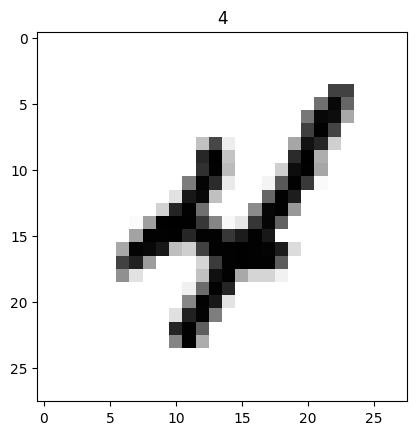

In [4]:
for i in range(10): # first 10 images in the training dataset
    plot_input_image(i)

## Preprosessing the images

In [5]:
#normalizing the pixel values of input image to [0,1] range by dividing them by 255.
X_train=X_train.astype(np.float32)/255 
X_test=X_test.astype(np.float32)/255

#reshape / expnad the dimansions of images to (28,28,1) to make them suitable for CNN model
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

#convert classes(output variable y) to one hot vectors
#one-hot encode the target labels to convert them into a binary matrix representation.
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [6]:
X_train.shape

(60000, 28, 28, 1)

In [7]:
#building the model(define the architecture of a convolutional neural network)
#define the CNN model architecture using Keras Sequential API
model= Sequential()

model.add(Conv2D(32, (3,3),input_shape=(28,28,1), activation='relu')) #adds a 2D convolutional layer
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))  # reduces the spatial dimensions of the input by half.

model.add(Conv2D(128, (3,3), activation='relu'))  #new layer ( adds another 2D convolutional layer)
model.add(MaxPool2D((2,2)))

model.add(Flatten())  # flattens 2D output of the previous layer into a 1D vector

model.add(Dropout(0.25)) #to prevent overfitting

model.add(Dense(256, activation='relu'))  # Increase number of neurons
model.add(Dense(10,activation="softmax")) #consists of 10 neurons, corresponding to the 10 classes in the MNIST dataset (digits 0 through 9)


c:\Users\nupur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,266 (501.04 KB)

 Trainable params: 128,266 (501.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#callbacks
from keras.callbacks import  EarlyStopping, ModelCheckpoint

#Early Stopping
es=EarlyStopping(monitor='val_accuracy', min_delta=0.01,patience=5,mode='max',verbose=1) 
# training will stop if the validation accuracy does not improve for 5 consecutive epochs.
# mode='max' ->  training will continue until the validation accuracy stops increasing


#model checkpoint
mc=ModelCheckpoint("./bestmodel.keras", monitor='val_accuracy',mode='max', save_best_only=True, verbose=1)

cb=[es,mc]

## Model Training

In [10]:
model.compile(optimizer='adam' , loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
his= model.fit(X_train,y_train, epochs=20, validation_split=0.3,callbacks=cb) #trains the model on the training data for 20 epochs with a validation split of 30%

Epoch 1/20
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8153 - loss: 0.5586
Epoch 1: val_accuracy improved from -inf to 0.97272, saving model to ./bestmodel.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.8155 - loss: 0.5582 - val_accuracy: 0.9727 - val_loss: 0.0886
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9692 - loss: 0.0976
Epoch 2: val_accuracy improved from 0.97272 to 0.97728, saving model to ./bestmodel.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 33s 25ms/step - accuracy: 0.9692 - loss: 0.0976 - val_accuracy: 0.9773 - val_loss: 0.0741
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9779 - loss: 0.0698
Epoch 3: val_accuracy improved from 0.97728 to 0.98317, saving model to ./bestmodel.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.9779 - loss: 0.0698 - val_accuracy: 0.9832 - val_loss: 0.0552
Epoch 4/20
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9820 - loss: 0.0577
Epoch 4: val_a

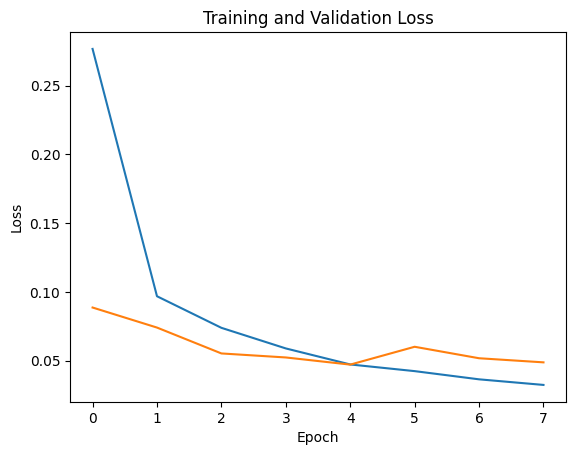

In [11]:
# Plot loss and validation loss  over epochs to visualize the model's training progress 
plt.plot(his.history['loss'], label='Training Loss')
plt.plot(his.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()


In [12]:
model.save("bestmodel.keras")

In [13]:
model_s=keras.models.load_model("C://Users//nupur//Desktop//Programs//Digitrecog//bestmodel.keras")

In [14]:
score=model.evaluate(X_test,y_test)

print(f" modle accuracy is {score[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9847 - loss: 0.0549
 modle accuracy is 0.9872000217437744


In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sn  # used for data visualization.
# Assuming y_test is one-hot encoded
y_true = y_test.argmax(axis=1)  # Convert true ( one-hot encoded) labels to class indices

# Assuming y_pred is probability distribution
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)  # Convert predicted probabilities to class indices
#uses the argmax method along axis 1 to find the index of the maximum value in each row

cm = confusion_matrix(y_true, y_pred)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print(f"Model accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Model accuracy: 0.9872


Text(95.72222222222221, 0.5, 'Truth')

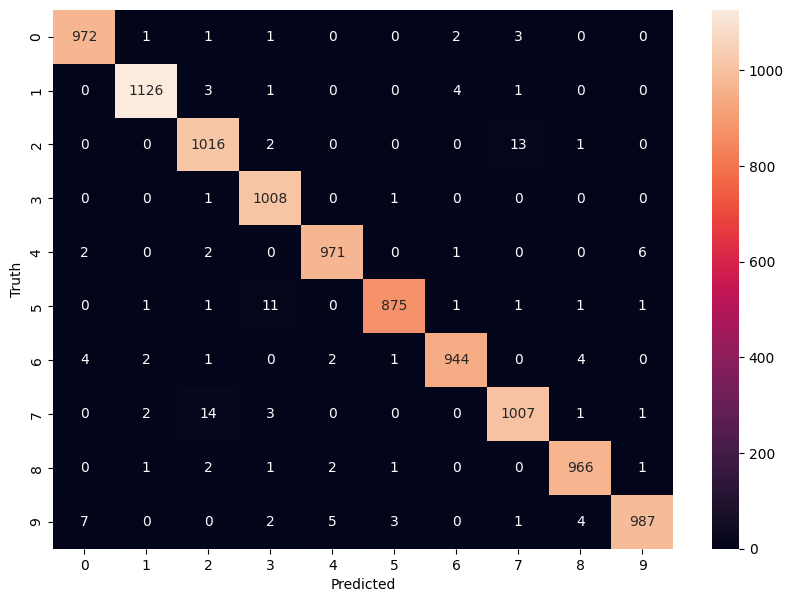

In [16]:
#create a heatmap plot of the confusion matrix
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [17]:
#testing against custom inputs
import cv2
import os
from keras.models import load_model
model= load_model('bestmodel.keras') #loading the model

In [18]:
losses,accuracys=model.evaluate(X_test,y_test)
print(losses)
print(accuracys)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9847 - loss: 0.0549
0.044461749494075775
0.9872000217437744


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
this digit might be 3


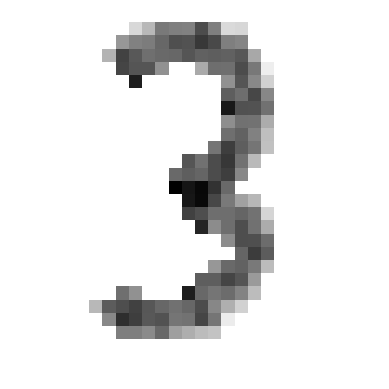

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
this digit might be 8


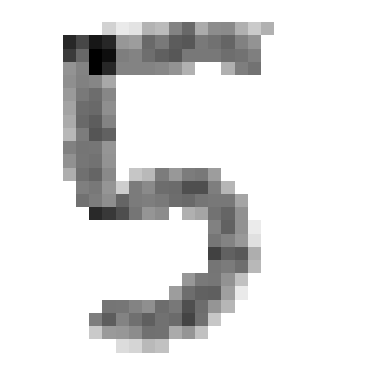

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
this digit might be 2


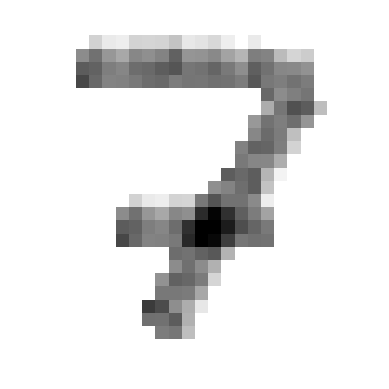

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
this digit might be 8


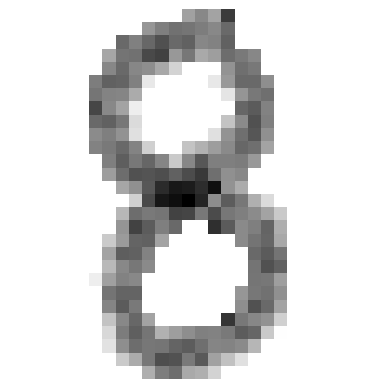

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
this digit might be 1


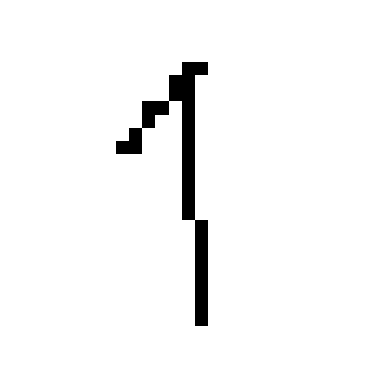

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
this digit might be 6


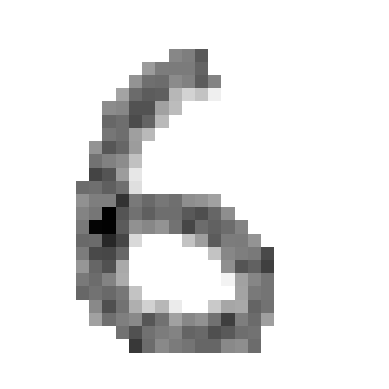

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
this digit might be 2


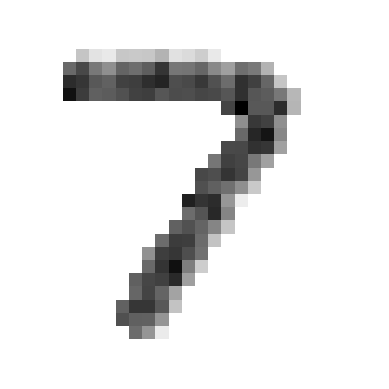

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
this digit might be 9


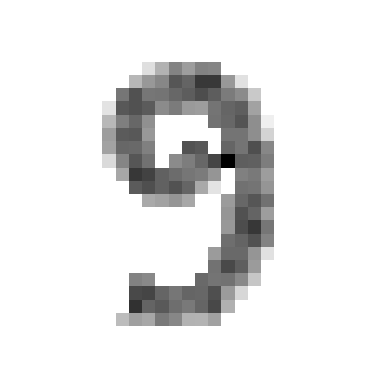

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
this digit might be 5


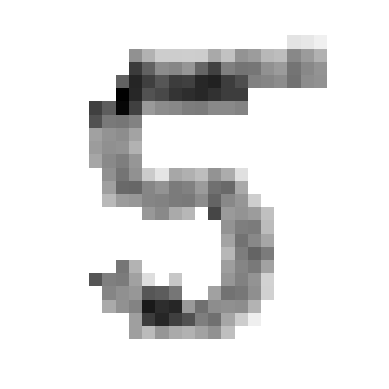

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
this digit might be 2


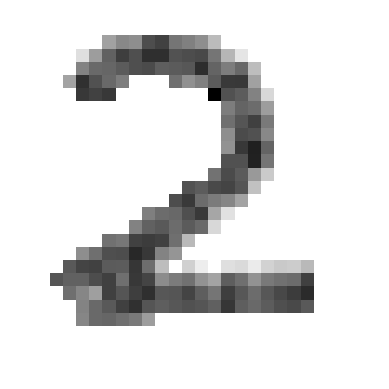

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
this digit might be 5


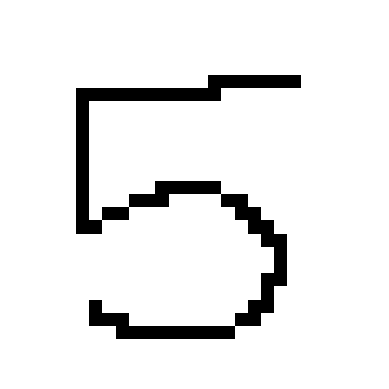

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
this digit might be 2


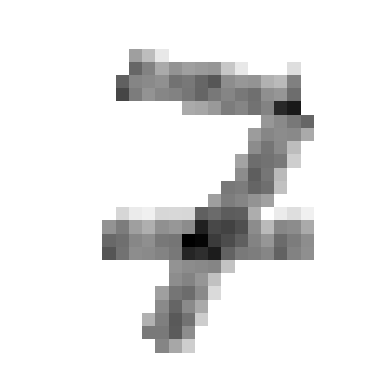

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
this digit might be 2


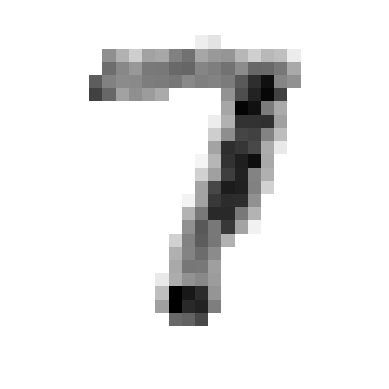

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
this digit might be 2


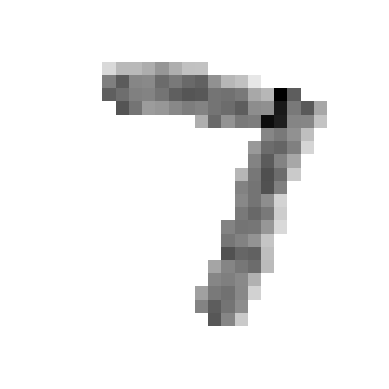

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
this digit might be 0


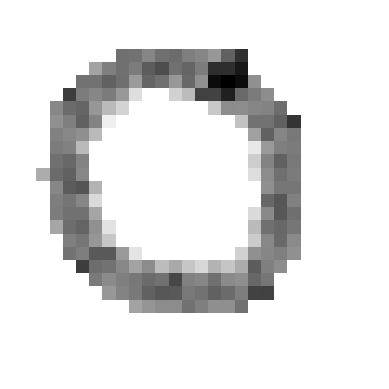

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
this digit might be 3


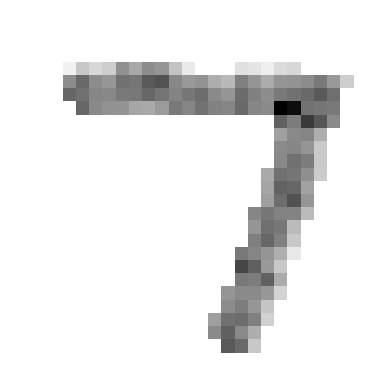

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
this digit might be 5


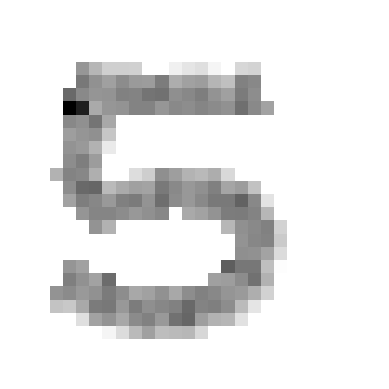

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
this digit might be 2


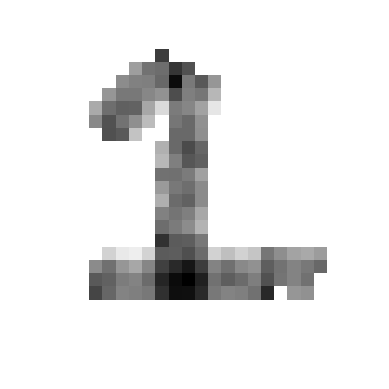

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
this digit might be 2


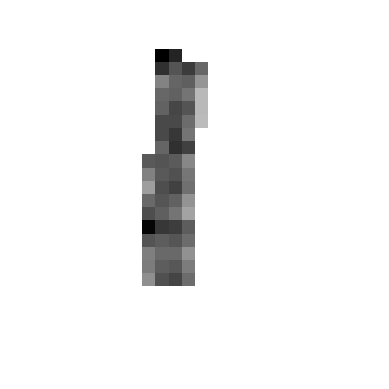

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
this digit might be 4


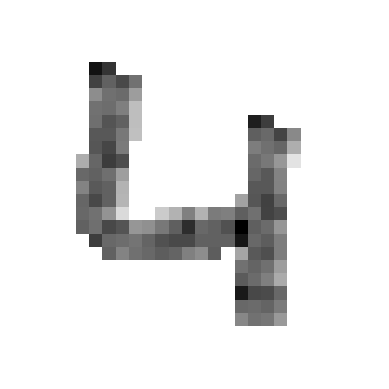

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
this digit might be 9


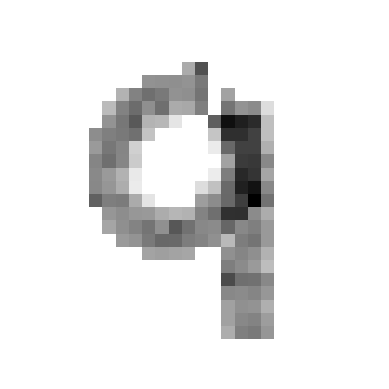

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
this digit might be 1


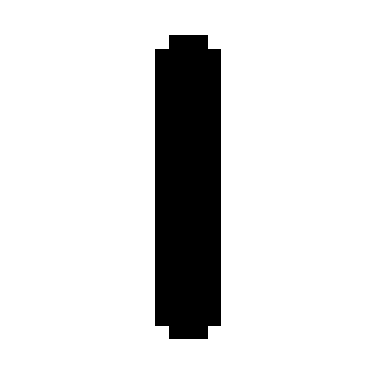

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
this digit might be 1


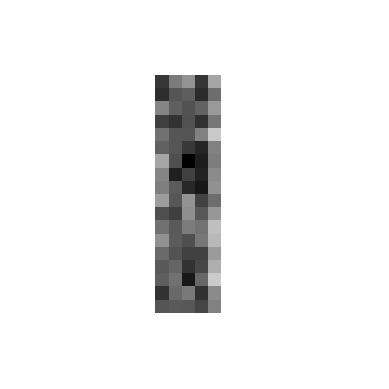

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
this digit might be 4


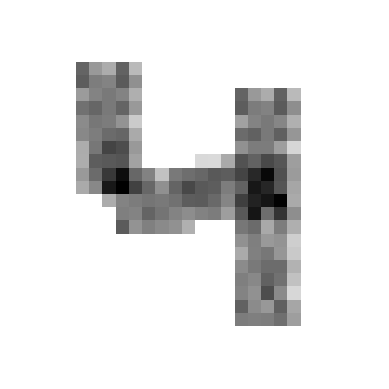

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
this digit might be 2


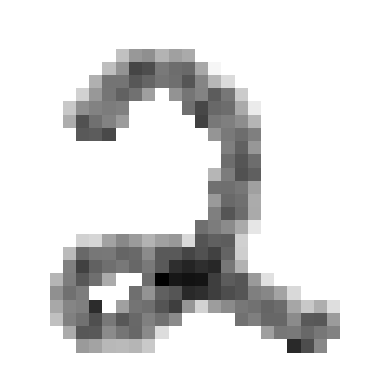

In [19]:
image_number=1
while os.path.isfile(f"digits/pic{image_number}.png"):
    try:
        img=cv2.imread(f"digits/pic{image_number}.png")[:,:,0]
        #Inverts the colors of the image 
        img=np.invert(np.array([img]))
        #have image in a list as numpy array
        
        prediction=model.predict(img) #Uses the trained model (model) to predict the digit represented by the image
        print(f"this digit might be {np.argmax(prediction)}") #returns the index of the maximum value in the prediction array, which corresponds to the predicted digit
        plt.imshow(img[0],cmap=plt.cm.binary) #displaying the image in black and white
        plt.axis("off")
        plt.show()
    except:
        print("error")
    finally:
        image_number+=1